In [1]:
%%capture 

# Important header information
amrwindfedir = '/projects/wind_uq/lcheung/amrwind-frontend'         # official version
#amrwindfedir = '/ascldap/users/lcheung/local/Git/amrwind-frontend'  # My copy
import sys, os
sys.path.insert(1, amrwindfedir)

# Load the libraries
import matplotlib.pyplot as plt
import amrwind_frontend  as amrwind
import numpy             as np
from matplotlib import cm

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

In [2]:
# DanAero Data
# See /ascldap/users/lcheung/GPFS1/2020/IEATask29/Field measurements Tjaereborg/Calibrated data/InflowLoadsAerodynamicsMeasurements_35Hz/PythonAnalysis/avgcolsWS.dat
# Run 16-07-2009/Tjaereborg_20090716_1250_000035.tim
DanAeroZ  = [17,        28.5,      41,        57,        77,        90]
DanAeroWS = [5.884,     5.973,     5.931,     6.128,     6.028,     6.088]

DanAeroZ2 = [17.574,    29.474,    41.739,    57.3,      77.254,    93.547]
DanAeroTI = [10.1274,   9.2976,    8.1857,    6.6971,    7.3315,    7.4028]

           #   WS,   TI,    alpha
TargetData = [[6.1, 0.068, 0.025]]

# Hub-height locations
plotheights=[57.19]

# Setup
## The input file

In [3]:
# Print the input file
inputfile='tutorial2.inp'
%cat tutorial2.inp

# --- Simulation time control parameters ---
time.stop_time                           = 20000.0             # Max (simulated) time to evolve [s]
time.max_step                            = 40000               
time.fixed_dt                            = 0.5                 # Fixed timestep size (in seconds). If negative, then time.cfl is used
time.checkpoint_interval                 = 2000                
incflo.physics                           = ABL                 # List of physics models to include in simulation.
incflo.verbose                           = 3                   
io.check_file                            = chk                 
incflo.use_godunov                       = true                
incflo.godunov_type                      = weno                
turbulence.model                         = OneEqKsgsM84        
TKE.source_terms                         = KsgsM84Src          
nodal_proj.mg_rtol                       = 1e-06               
nodal_proj.mg_atol             

## Plot the domain

This is what the case looks like -- it should be a 1.5km x 1.5km case with wind from 230 degrees southwest.

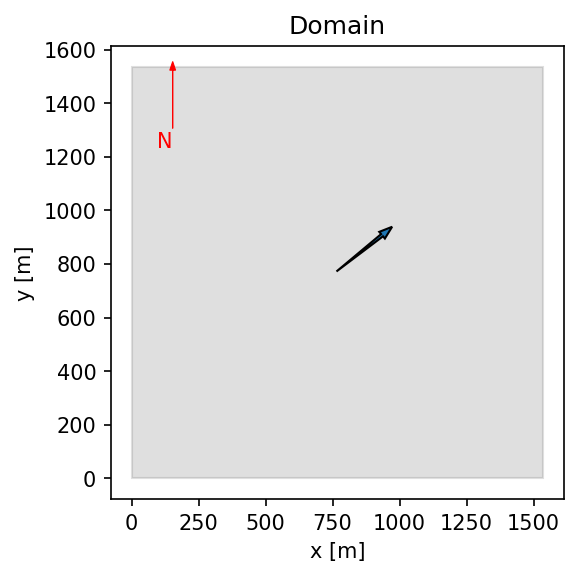

In [4]:
# Start the amrwind_frontend app 
tutorial2 = amrwind.MyApp.init_nogui()

# Load the input into the app
tutorial2.loadAMRWindInput(inputfile)

fig, ax = plt.subplots(figsize=(4,4), facecolor='w', dpi=150)

# Set any additional items to plot
tutorial2.popup_storteddata['plotdomain']['plot_sampleprobes']    = [] #['p_hub']
tutorial2.plotDomain(ax=ax)

### Submitting the job
You can submit this job using
```bash
sbatch run1.sh
```

# Postprocessing

In [5]:
 # Set your run directory here
#casedir = '/ascldap/users/lcheung/GPFS1/2020/IEATask29/IEATask29_precursor.github/REF1_ABLIO/baseprecursor_WDir230/' 
casedir = './'

# Average between 15,000 sec to 20,000 sec
avgtimes = [15000, 20000]

## Plot the sample planes

In [6]:
tutorial2.Samplepostpro_loadnetcdffile(casedir+'/post_processing/sampling00000.nc')

Loading .//post_processing/sampling00000.nc


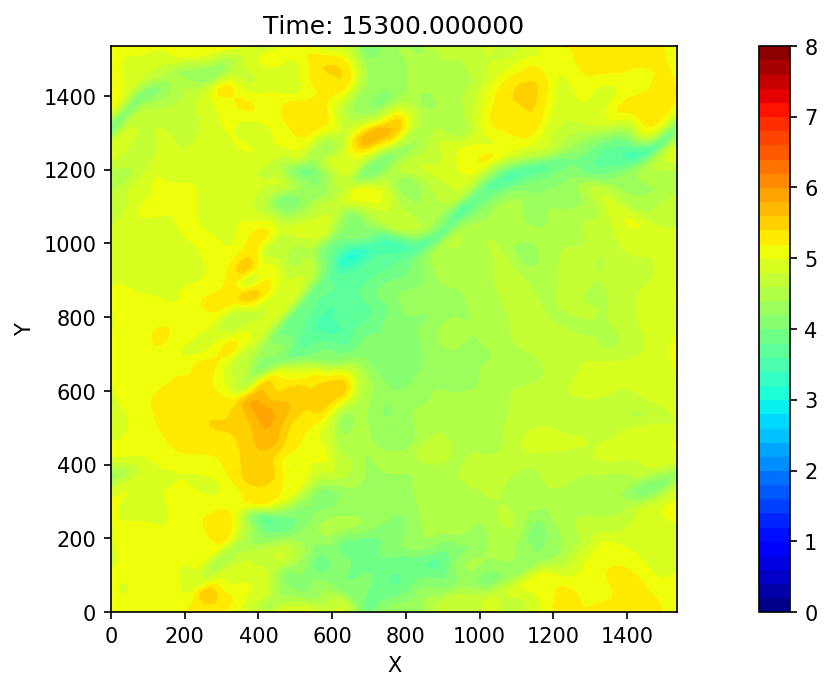

In [7]:
levels =np.linspace(0,8,41)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6,5), gridspec_kw={'width_ratios': [1, 0.05]}, dpi=150)
im1 = tutorial2.plotSamplePlane('p_hub', 'velocityx', 306, 3, 'X','Y',ax=ax1, colorbar=False, levels=levels, cmap=cm.jet)
fig.colorbar(im1[0], cax=ax2)

## Plot the ABL statistics

In [8]:
tutorial2.ABLpostpro_loadnetcdffile(casedir+'/post_processing/abl_statistics00000.nc')

Loading .//post_processing/abl_statistics00000.nc
Time range: 0.500000 to 20000.000000
Done.


In [9]:
# First, let's look at the hub-height averaged statistics
tutorial2.ABLpostpro_printreport(avgt=avgtimes, avgz=plotheights)

Loading w'theta'_r
Loading theta
Loading u
Loading v'v'_r
Loading v
Loading u'u'_r
Loading w'w'_r
        z       Uhoriz      WindDir       TI_TKE     TI_horiz        Alpha     ObukhovL 
      ===         ====         ====         ====         ====         ====         ==== 
    57.19 6.129959e+00 2.300725e+02 2.818937e-02 4.651985e-02 2.969138e-02 -4.795765e+01 

ustar: 0.192736


### Plot scalar statistics

ustar


(0, 0.25)

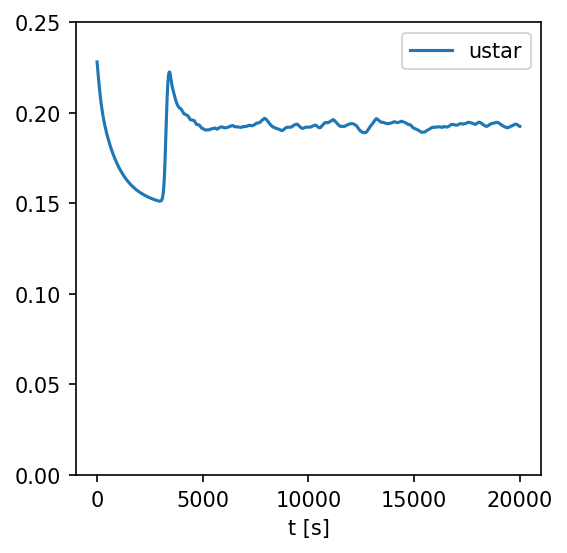

In [10]:
fig, ax = plt.subplots(figsize=(4,4), facecolor='w', dpi=150)
tutorial2.ABLpostpro_plotscalars(ax=ax, plotvars=['ustar'])
ax.set_ylim([0, 0.25])

abl_forcing_x
abl_forcing_y


(-0.002, 0.002)

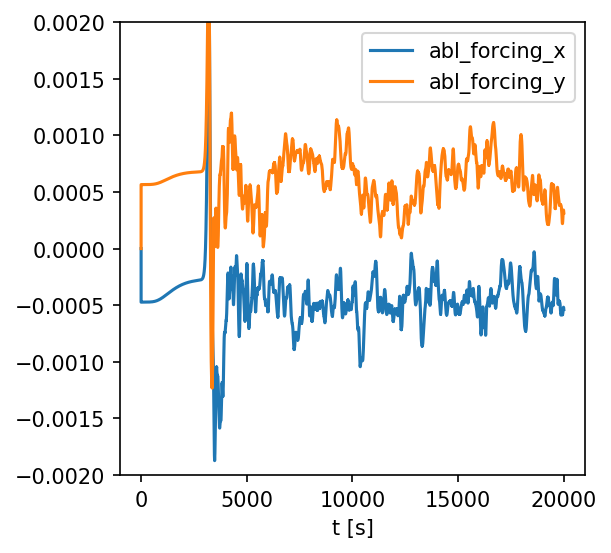

In [11]:
fig, ax = plt.subplots(figsize=(4,4), facecolor='w', dpi=150)
tutorial2.ABLpostpro_plotscalars(ax=ax, plotvars=['abl_forcing_x', 'abl_forcing_y'])
ax.set_ylim([-0.002, 0.002])

### Plot profile statistics

Loading u
Loading v


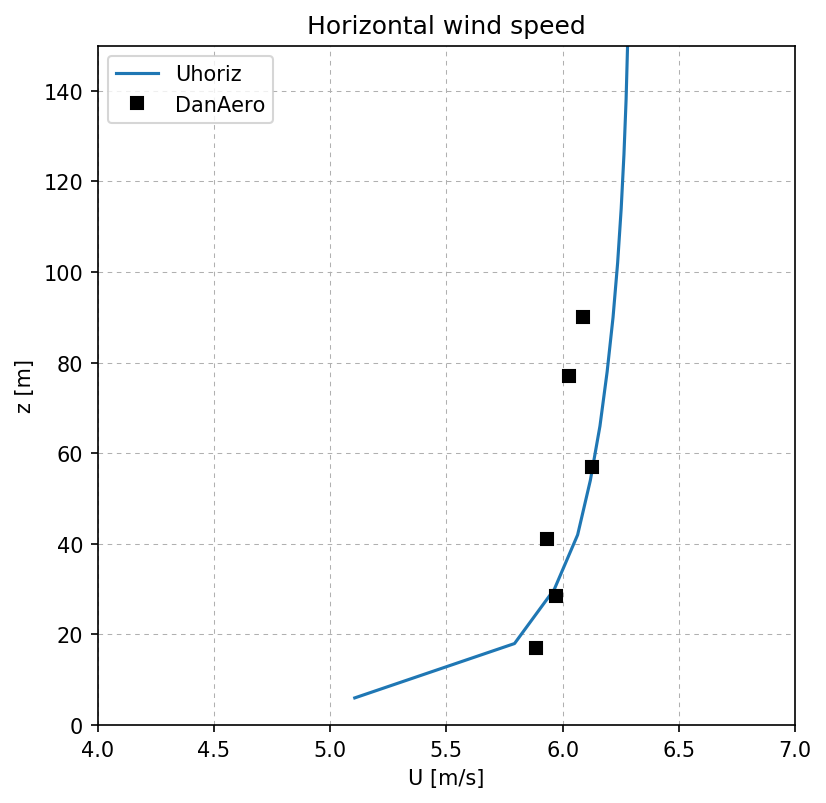

In [12]:
# Plot velocity
fig, ax = plt.subplots(figsize=(6,6), facecolor='w', dpi=150)
tutorial2.ABLpostpro_plotprofiles(ax=ax, plotvars=['Uhoriz'], avgt=avgtimes)
ax.plot(DanAeroWS, DanAeroZ, 's', color='k', label='DanAero')
ax.legend()
ax.set_xlim([4, 7])
ax.set_xlabel('U [m/s]')
ax.grid(linestyle=':', linewidth=0.5)
ax.set_ylim([0,150])
ax.set_title('Horizontal wind speed')

Loading u
Loading v
Loading u'u'_r
Loading v'v'_r


(0, 150)

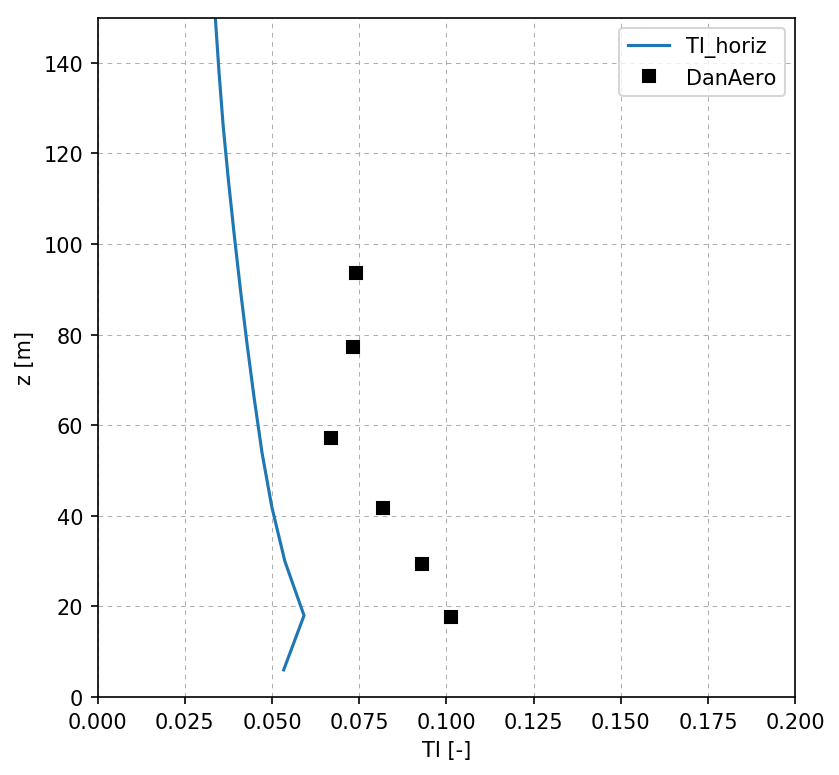

In [13]:
# Plot velocity
fig, ax = plt.subplots(figsize=(6,6), facecolor='w', dpi=150)
tutorial2.ABLpostpro_plotprofiles(ax=ax, plotvars=['TI_horiz'], avgt=avgtimes)
ax.plot(np.array(DanAeroTI)/100.0, DanAeroZ2, 's', color='k', label='DanAero')
ax.legend()
ax.set_xlim([0, 0.2])
ax.set_xlabel('TI [-]')
ax.grid(linestyle=':', linewidth=0.5)
ax.set_ylim([0,150])
#ax.set_title('Horizontal wind speed')